# **Installing Required Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow keras scikit-learn matplotlib seaborn opencv-python-headless pyyaml huggingface_hub openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 742.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 149.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 167.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.5 MB/s eta 0:00:00


In [ ]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 6.9 MB/s eta 0:00:00


# **Downloading DataSets**

In [ ]:
# Install Kaggle API
!pip install -q kaggle

# Upload kaggle.json if not already in ~/.kaggle (manually use the left sidebar or code widget to upload)
import os
os.makedirs('/root/.kaggle', exist_ok=True)
# If you uploaded via code:
from google.colab import files
files.upload()  # Select the kaggle.json you downloaded

# Move to the correct location and set permission
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
# Download ODIR-5K
!kaggle datasets download andrewmvd/ocular-disease-recognition-odir5k
!unzip -q ocular-disease-recognition-odir5k.zip -d ./odir5k


Dataset URL: https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k
License(s): other
 96% 1.56G/1.62G [00:07<00:00, 109MB/s]
100% 1.62G/1.62G [00:07<00:00, 238MB/s]


In [ ]:
# Download cataractdataset from Kaggle
!kaggle datasets download jr2ngb/cataractdataset

# Unzip
!unzip -q cataractdataset.zip -d ./cataractdataset

Dataset URL: https://www.kaggle.com/datasets/jr2ngb/cataractdataset
License(s): unknown
 99% 3.32G/3.34G [00:27<00:00, 235MB/s]
100% 3.34G/3.34G [00:27<00:00, 130MB/s]


# **Importing Libraries**

In [ ]:
!pip install efficientnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
import os, glob, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import get_custom_objects
import efficientnet.tfkeras as efn
from tqdm import tqdm

# **Set configurations and read metadata**

In [ ]:
SEED = 42
EPOCHS = 100
BATCH_SIZE = 32
IMG_HEIGHT = 192
IMG_WIDTH = 256

# cataract dataset
IMG_ROOT = '/content/drive/MyDrive/cataractdataset/dataset/'
IMG_DIR = [IMG_ROOT+'1_normal',
           IMG_ROOT+'2_cataract',
           IMG_ROOT+'2_glaucoma',
           IMG_ROOT+'3_retina_disease']

# ocular-disease-recognition dataset
OCU_IMG_ROOT = '/content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/Training Images'
ocu_df = pd.read_excel('/content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/data.xlsx')

In [ ]:
def seed_everything(seed):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.random.set_seed(seed)

seed_everything(SEED)

# **Process Cataract dataset**

In [ ]:
cat_df = pd.DataFrame(0,
                  columns=['paths',
                           'cataract'],
                  index=range(601))

filepaths = glob.glob(IMG_ROOT + '*/*')


for i, filepath in enumerate(filepaths):
    filepath = os.path.split(filepath)
    cat_df.iloc[i, 0] = filepath[0] + '/' + filepath[1]

    if filepath[0] == IMG_DIR[0]:    # normal
        cat_df.iloc[i, 1] = 0
    elif filepath[0] == IMG_DIR[1]:  # cataract
        cat_df.iloc[i, 1] = 1
    elif filepath[0] == IMG_DIR[2]:  # glaucoma
        cat_df.iloc[i, 1] = 2
    elif filepath[0] == IMG_DIR[3]:  # retine_disease
        cat_df.iloc[i, 1] = 3

# only sample normal and cataract
cat_df = cat_df.query('0 <= cataract < 2')
cat_df

/tmp/ipython-input-3456353115.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '/content/drive/MyDrive/cataractdataset/dataset/2_glaucoma/Glaucoma_025.png' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cat_df.iloc[i, 0] = filepath[0] + '/' + filepath[1]


,paths,cataract
101,/content/drive/MyDrive/cataractdataset/dataset...,1
102,/content/drive/MyDrive/cataractdataset/dataset...,1
103,/content/drive/MyDrive/cataractdataset/dataset...,1
104,/content/drive/MyDrive/cataractdataset/dataset...,1
105,/content/drive/MyDrive/cataractdataset/dataset...,1
...,...,...
496,/content/drive/MyDrive/cataractdataset/dataset...,0
497,/content/drive/MyDrive/cataractdataset/dataset...,0
498,/content/drive/MyDrive/cataractdataset/dataset...,0
499,/content/drive/MyDrive/cataractdataset/dataset...,0


In [ ]:

print('Number of normal and cataract images')
print(cat_df['cataract'].value_counts())


Number of normal and cataract images
cataract
0    300
1    100
Name: count, dtype: int64


# **Process Ocular disease recognition dataset**

In [ ]:
ocu_df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [ ]:
def has_cataract_mentioned(text):
    if 'cataract' in text:
        return 1
    else:
        return 0

ocu_df['left_eye_cataract'] = ocu_df['Left-Diagnostic Keywords']\
                                 .apply(lambda x: has_cataract_mentioned(x))
ocu_df['right_eye_cataract'] = ocu_df['Right-Diagnostic Keywords']\
                                 .apply(lambda x: has_cataract_mentioned(x))

In [ ]:
le_df = ocu_df.loc[:, ['Left-Fundus', 'left_eye_cataract']]\
        .rename(columns={'left_eye_cataract':'cataract'})
le_df['paths'] = OCU_IMG_ROOT + le_df['Left-Fundus']
le_df = le_df.drop('Left-Fundus', axis=1)


re_df = ocu_df.loc[:, ['Right-Fundus', 'right_eye_cataract']]\
        .rename(columns={'right_eye_cataract':'cataract'})
re_df['paths'] = OCU_IMG_ROOT + re_df['Right-Fundus']
re_df = re_df.drop('Right-Fundus', axis=1)

In [ ]:
le_df.head()

,cataract,paths
0,1,/content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/...
1,0,/content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/...
2,0,/content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/...
3,0,/content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/...
4,0,/content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/...


In [ ]:
re_df.head()


,cataract,paths
0,0,/content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/...
1,0,/content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/...
2,0,/content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/...
3,0,/content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/...
4,0,/content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/...


In [ ]:
print('Number of left eye images')
print(le_df['cataract'].value_counts())
print('\nNumber of right eye images')
print(re_df['cataract'].value_counts())

Number of left eye images
cataract
0    3341
1     159
Name: count, dtype: int64

Number of right eye images
cataract
0    3346
1     154
Name: count, dtype: int64


**there is a large bias in data so make it even**

In [ ]:
def downsample(df):
    df = pd.concat([
        df.query('cataract==1'),
        df.query('cataract==0').sample(sum(df['cataract']),
                                       random_state=SEED)
    ])
    return df


le_df = downsample(le_df)
re_df = downsample(re_df)

print('Number of left eye images')
print(le_df['cataract'].value_counts())
print('\nNumber of right eye images')
print(re_df['cataract'].value_counts())

Number of left eye images
cataract
1    159
0    159
Name: count, dtype: int64

Number of right eye images
cataract
1    154
0    154
Name: count, dtype: int64


In [ ]:

ocu_df = pd.concat([le_df, re_df])
ocu_df.head()

,cataract,paths
0,1,/content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/...
81,1,/content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/...
103,1,/content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/...
119,1,/content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/...
253,1,/content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/...


# **Create Dataset with Combined Both**

In [ ]:
df = pd.concat([cat_df, ocu_df], ignore_index=True)
df

,paths,cataract
0,/content/drive/MyDrive/cataractdataset/dataset...,1
1,/content/drive/MyDrive/cataractdataset/dataset...,1
2,/content/drive/MyDrive/cataractdataset/dataset...,1
3,/content/drive/MyDrive/cataractdataset/dataset...,1
4,/content/drive/MyDrive/cataractdataset/dataset...,1
...,...,...
1021,/content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/...,0
1022,/content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/...,0
1023,/content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/...,0
1024,/content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/...,0


In [ ]:
train_df, test_df = train_test_split(df,
                                     test_size=0.2,
                                     random_state=SEED,
                                     stratify=df['cataract'])

train_df, val_df = train_test_split(train_df,
                                    test_size=0.15,
                                    random_state=SEED,
                                    stratify=train_df['cataract'])

In [ ]:
import os
from pathlib import Path
for p in train_df['paths'].iloc[:10]:
    print("raw path:", p)
    # If bytes, decode (sometimes happens)
    if isinstance(p, bytes):
        p = p.decode()
    print("exists:", os.path.exists(p), " Path.resolve:", Path(p).resolve() if os.path.exists(p) else "")
    img = cv2.imread(p)
    print("cv2.imread returned None?:", img is None)
    print("----")

raw path: /content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/Training Images/1618_right.jpg
exists: True  Path.resolve: /content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/Training Images/1618_right.jpg
cv2.imread returned None?: False
----
raw path: /content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/Training Images/471_right.jpg
exists: True  Path.resolve: /content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/Training Images/471_right.jpg
cv2.imread returned None?: False
----
raw path: /content/drive/MyDrive/cataractdataset/dataset/1_normal/NL_223.png
exists: True  Path.resolve: /content/drive/MyDrive/cataractdataset/dataset/1_normal/NL_223.png
cv2.imread returned None?: False
----
raw path: /content/drive/MyDrive/cataractdataset/dataset/2_cataract/cataract_086.png
exists: True  Path.resolve: /content/drive/MyDrive/cataractdataset/dataset/2_cataract/cataract_086.png
cv2.imread returned None?: False
----
raw path: /content/drive/MyDrive/odir5k/ODIR-5K/ODIR-5K/Training Images/2251_left.jpg
exists: True  Path.r

In [ ]:

def create_datasets(df, img_width, img_height):
    imgs = []
    for path in tqdm(df['paths']):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (img_width, img_height))
        imgs.append(img)

    imgs = np.array(imgs, dtype='float32')
    df = pd.get_dummies(df['cataract'])
    return imgs, df


train_imgs, train_df = create_datasets(train_df, IMG_WIDTH, IMG_HEIGHT)
val_imgs, val_df = create_datasets(val_df, IMG_WIDTH, IMG_HEIGHT)
test_imgs, test_df = create_datasets(test_df, IMG_WIDTH, IMG_HEIGHT)

train_imgs = train_imgs / 255.0
val_imgs = val_imgs / 255.0
test_imgs = test_imgs / 255.0

100%|██████████| 206/206 [00:07<00:00, 28.75it/s]


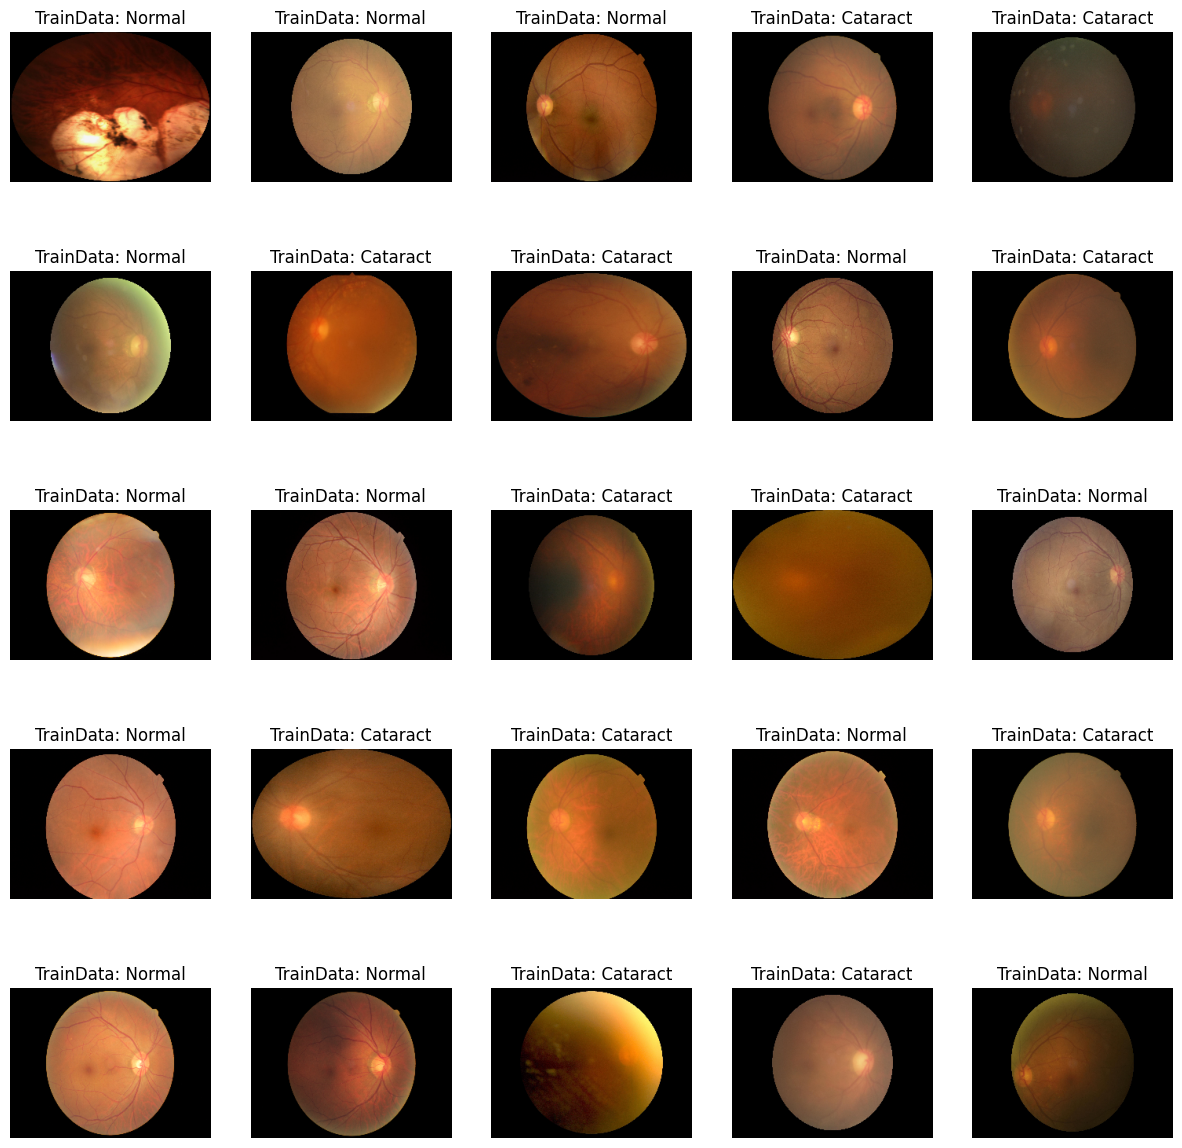

In [ ]:
# plot the first 25 sheets of image data for training

f, ax = plt.subplots(5, 5, figsize=(15,15))
norm_list = list(train_df[0][:25])
for i, img in enumerate(train_imgs[:25]):
    ax[i//5, i%5].imshow(img)
    ax[i//5, i%5].axis('off')
    if norm_list[i] == 1:
        ax[i//5, i%5].set_title('TrainData: Normal')
    else:
        ax[i//5, i%5].set_title('TrainData: Cataract')
plt.show()

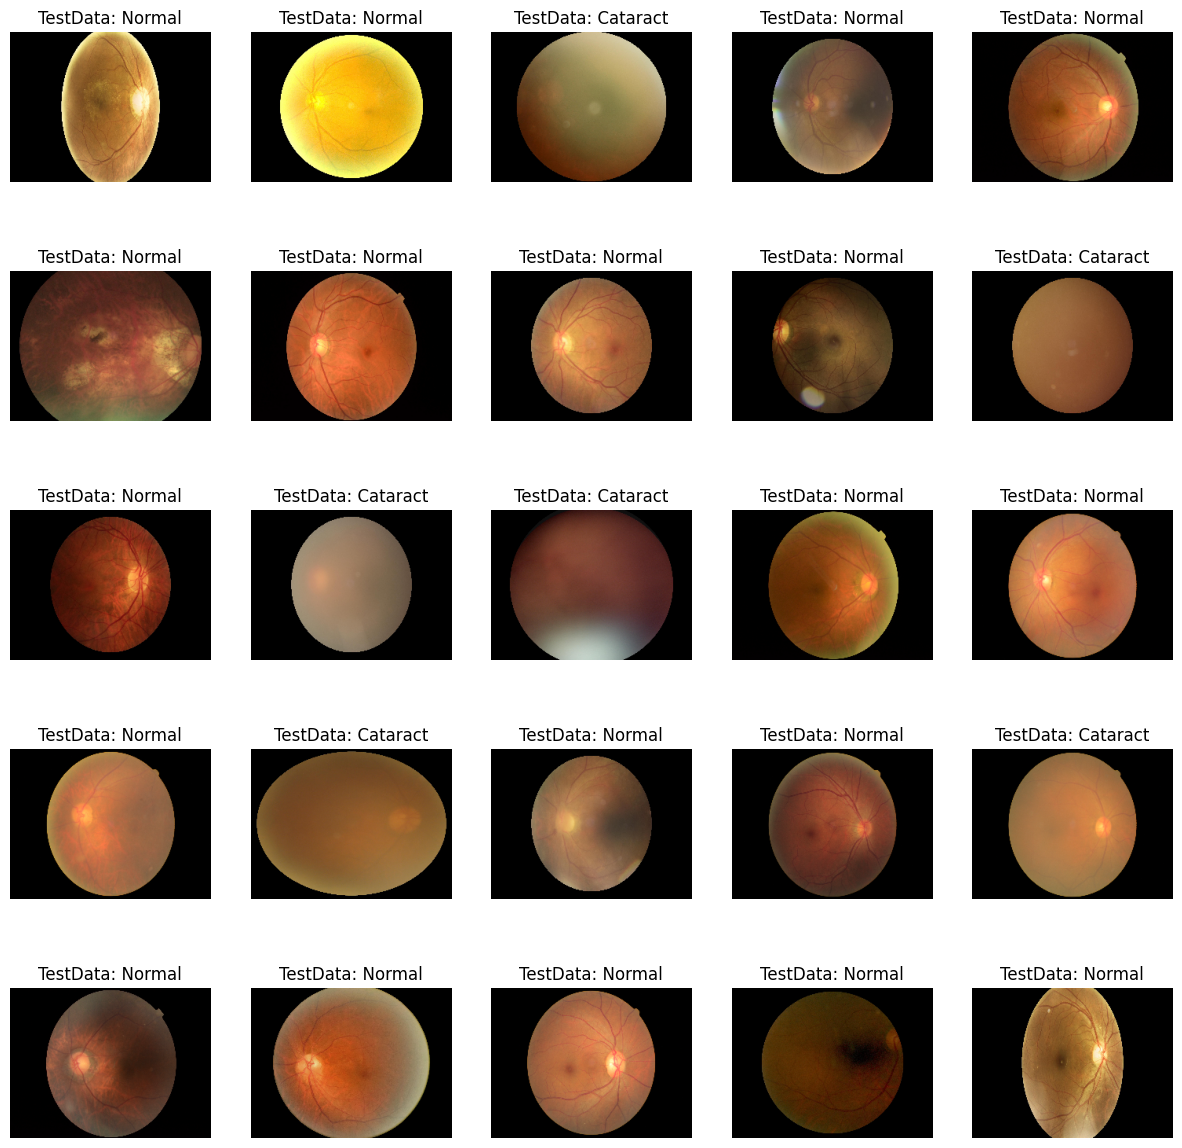

In [ ]:
# plot the first 25 sheets of image data for Test
f, ax = plt.subplots(5, 5, figsize=(15,15))
norm_list = list(test_df[0][:25])
for i, img in enumerate(test_imgs[:25]):
    ax[i//5, i%5].imshow(img)
    ax[i//5, i%5].axis('off')
    if norm_list[i] == 1:
        ax[i//5, i%5].set_title('TestData: Normal')
    else:
        ax[i//5, i%5].set_title('TestData: Cataract')
plt.show()

# **Build the model(1)**

In [ ]:
class Mish(tf.keras.layers.Layer):

    def __init__(self, **kwargs):
        super(Mish, self).__init__(**kwargs)
        self.supports_masking = True

    def call(self, inputs):
        return inputs * K.tanh(K.softplus(inputs))

    def get_config(self):
        base_config = super(Mish, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def compute_output_shape(self, input_shape):
        return input_shape
def mish(x):
    return tf.keras.layers.Lambda(lambda x: x*K.tanh(K.softplus(x)))(x)

get_custom_objects().update({'mish': Activation(mish)})

In [ ]:
input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)

model = Sequential()
model.add(Conv2D(16, kernel_size=3, padding='same',
                 input_shape=input_shape, activation='mish'))
model.add(Conv2D(16, kernel_size=3, padding='same', activation='mish'))
model.add(BatchNormalization())
model.add(MaxPool2D(3))
model.add(Dropout(0.3))
model.add(Conv2D(16, kernel_size=3, padding='same', activation='mish'))
model.add(Conv2D(16, kernel_size=3, padding='same', activation='mish'))
model.add(BatchNormalization())
model.add(MaxPool2D(3))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 192, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 192, 256, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 192, 256, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 85, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 85, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 85, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 85, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 85, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 21, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 21, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │        18,818 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,354 (102.95 KB)

 Trainable params: 26,290 (102.70 KB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
generator = ImageDataGenerator(horizontal_flip=True,
                               height_shift_range=0.1,
                               fill_mode='reflect')



es_callback = tf.keras.callbacks.EarlyStopping(patience=20,
                                               verbose=1,
                                               restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=10, verbose=1)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 493ms/step - accuracy: 0.5254 - loss: 3.7598 - val_accuracy: 0.4390 - val_loss: 0.6828 - learning_rate: 0.0010
Epoch 2/100
 1/21 ━━━━━━━━━━━━━━━━━━━━ 9s 471ms/step - accuracy: 0.6562 - loss: 0.8290

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6562 - loss: 0.8290 - val_accuracy: 0.4390 - val_loss: 0.7035 - learning_rate: 0.0010
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 486ms/step - accuracy: 0.6080 - loss: 1.1415 - val_accuracy: 0.7724 - val_loss: 0.6438 - learning_rate: 0.0010
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8800 - loss: 0.3382 - val_accuracy: 0.7642 - val_loss: 0.6373 - learning_rate: 0.0010
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 475ms/step - accuracy: 0.7395 - loss: 0.7234 - val_accuracy: 0.5854 - val_loss: 0.6762 - learning_rate: 0.0010
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7188 - loss: 0.8948 - val_accuracy: 0.6829 - val_loss: 0.6579 - learning_rate: 0.0010
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 481ms/step - accuracy: 0.6691 - loss: 1.0616 - val_accuracy: 0.6341 - val_loss: 0.5925 - learning_rate: 0.0010
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6250 - loss: 1.3432 - val_ac

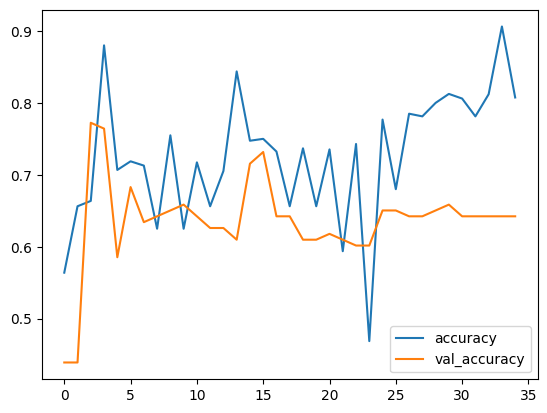

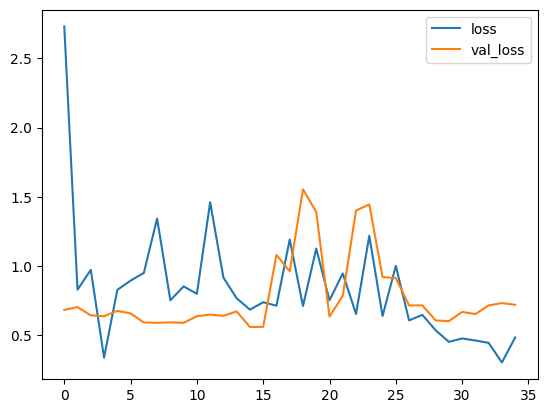

In [ ]:
history = model.fit(
    generator.flow(train_imgs, train_df, batch_size=BATCH_SIZE),
    epochs=EPOCHS,
    steps_per_epoch=len(train_imgs) // BATCH_SIZE,   # FIXED
    callbacks=[es_callback, reduce_lr],
    validation_data=(val_imgs, val_df)
)

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.show()

In [ ]:
model.evaluate(test_imgs, test_df)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.7033 - loss: 0.5595


[0.5806719064712524, 0.6844660043716431]

# **Build the model(2)**

In [ ]:
def build_model(img_height, img_width, n):
    inp = Input(shape=(img_height,img_width,n))
    efnet = efn.EfficientNetB0(
        input_shape=(img_height,img_width,n),
        weights='imagenet',
        include_top=False
    )
    x = efnet(inp)
    x = GlobalAveragePooling2D()(x)
    x = Dense(2, activation='softmax')(x)
    model = tf.keras.Model(inputs=inp, outputs=x)
    opt = tf.keras.optimizers.Adam(learning_rate=0.000003)
    loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.01)
    model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
    return model

model = build_model(IMG_HEIGHT, IMG_WIDTH, 3)
model.summary()

Model: "functional_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 192, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnet-b0 (Functional)    │ (None, 6, 8, 1280)     │     4,049,564 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,052,126 (15.46 MB)

 Trainable params: 4,010,110 (15.30 MB)

 Non-trainable params: 42,016 (164.12 KB)

In [ ]:
generator = ImageDataGenerator(horizontal_flip=True,
                               height_shift_range=0.1,
                               fill_mode='reflect')



es_callback = tf.keras.callbacks.EarlyStopping(patience=20,
                                               verbose=1,
                                               restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=10, verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.5784 - loss: 0.6910 - val_accuracy: 0.5610 - val_loss: 0.6912 - learning_rate: 3.0000e-06
Epoch 2/100
 1/21 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4688 - loss: 0.7463

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4688 - loss: 0.7463 - val_accuracy: 0.5610 - val_loss: 0.6916 - learning_rate: 3.0000e-06
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5907 - loss: 0.6712 - val_accuracy: 0.5691 - val_loss: 0.6898 - learning_rate: 3.0000e-06
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7500 - loss: 0.5342 - val_accuracy: 0.5691 - val_loss: 0.6887 - learning_rate: 3.0000e-06
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6794 - loss: 0.6087 - val_accuracy: 0.5935 - val_loss: 0.6715 - learning_rate: 3.0000e-06
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7500 - loss: 0.5589 - val_accuracy: 0.5854 - val_loss: 0.6704 - learning_rate: 3.0000e-06
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6956 - loss: 0.5817 - val_accuracy: 0.6016 - val_loss: 0.6488 - learning_rate: 3.0000e-06
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6250 - loss: 

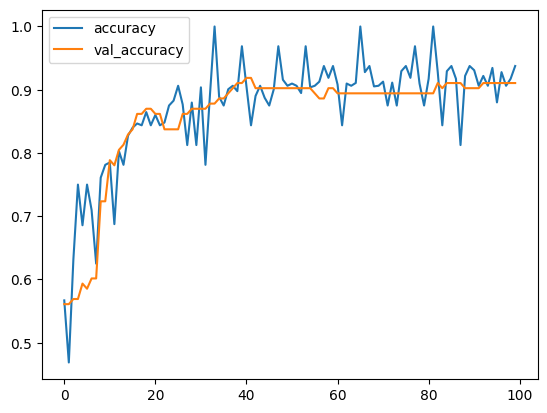

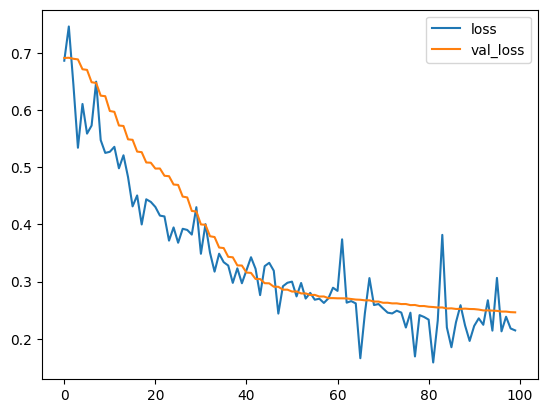

In [ ]:
history = model.fit(
    generator.flow(train_imgs, train_df, batch_size=BATCH_SIZE),
    epochs=EPOCHS,
    steps_per_epoch=len(train_imgs) // BATCH_SIZE,   # FIXED
    callbacks=[es_callback, reduce_lr],
    validation_data=(val_imgs, val_df)
)


pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.show()

In [ ]:
model.evaluate(test_imgs, test_df)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 0.9129 - loss: 0.2606


[0.24448531866073608, 0.9271844625473022]

#**Using Resnet**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf

def build_resnet(img_height, img_width, n, num_classes=2):
    inp = Input(shape=(img_height, img_width, n))
    base = ResNet50(
        input_shape=(img_height, img_width, n),
        weights="imagenet",
        include_top=False
    )
    x = base(inp)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=inp, outputs=x)

    opt = tf.keras.optimizers.Adam(learning_rate=3e-6)
    loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.01)
    model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])

    return model

# Usage
resnet_model = build_resnet(IMG_HEIGHT, IMG_WIDTH, 3)
resnet_model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 192, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 6, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │         4,098 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,591,810 (90.00 MB)

 Trainable params: 23,538,690 (89.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9105 - loss: 0.2453 - val_accuracy: 0.9106 - val_loss: 0.2450 - learning_rate: 3.0000e-06
Epoch 2/100
 1/21 ━━━━━━━━━━━━━━━━━━━━ 18s 930ms/step - accuracy: 0.9375 - loss: 0.2253

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9375 - loss: 0.2253 - val_accuracy: 0.9106 - val_loss: 0.2450 - learning_rate: 3.0000e-06
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9274 - loss: 0.2133 - val_accuracy: 0.9106 - val_loss: 0.2448 - learning_rate: 3.0000e-06
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 1.0000 - loss: 0.1018 - val_accuracy: 0.9106 - val_loss: 0.2452 - learning_rate: 3.0000e-06
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9334 - loss: 0.2007 - val_accuracy: 0.9106 - val_loss: 0.2447 - learning_rate: 3.0000e-06
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9062 - loss: 0.2695 - val_accuracy: 0.9106 - val_loss: 0.2443 - learning_rate: 3.0000e-06
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9426 - loss: 0.1867 - val_accuracy: 0.9106 - val_loss: 0.2436 - learning_rate: 3.0000e-06
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9600 - loss: 

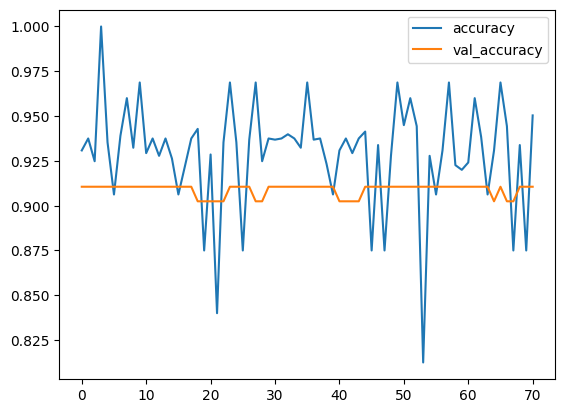

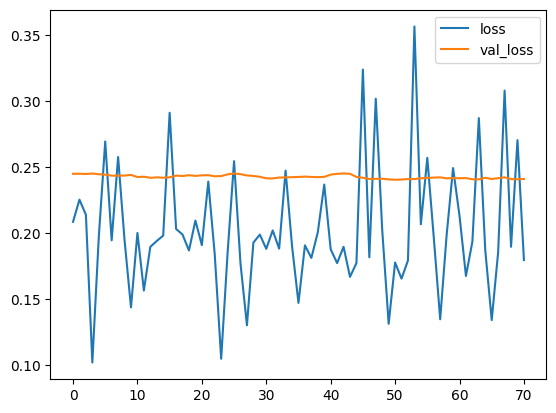

In [ ]:
history = model.fit(
    generator.flow(train_imgs, train_df, batch_size=BATCH_SIZE),
    epochs=EPOCHS,
    steps_per_epoch=len(train_imgs) // BATCH_SIZE,   # FIXED
    callbacks=[es_callback, reduce_lr],
    validation_data=(val_imgs, val_df)
)


pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.show()

In [ ]:
model.evaluate(test_imgs, test_df)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.9058 - loss: 0.2577


[0.23658202588558197, 0.9271844625473022]

#**Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_val, y_val, class_names):
    """
    Evaluates a trained model on validation data and prints metrics.

    Parameters:
        model        : trained keras model
        X_val        : validation images (numpy array)
        y_val        : validation labels (one-hot encoded)
        class_names  : list of class labels (e.g. ["class0", "class1"])
    """

    # True labels (convert one-hot → int)
    y_true = np.argmax(y_val, axis=1)

    # Predictions
    y_pred_probs = model.predict(X_val)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    # Classification Report
    print("Classification Report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Extra Metrics: Sensitivity & Specificity
    TN, FP, FN, TP = cm.ravel() if cm.size == 4 else (0,0,0,0)  # works for binary
    if cm.size == 4:
        sensitivity = TP / (TP + FN)  # Recall for positive class
        specificity = TN / (TN + FP)  # Recall for negative class
        print(f"Sensitivity (Recall+): {sensitivity:.4f}")
        print(f"Specificity (Recall-): {specificity:.4f}")


🔹 Sequential CNN (Mish) Evaluation
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step


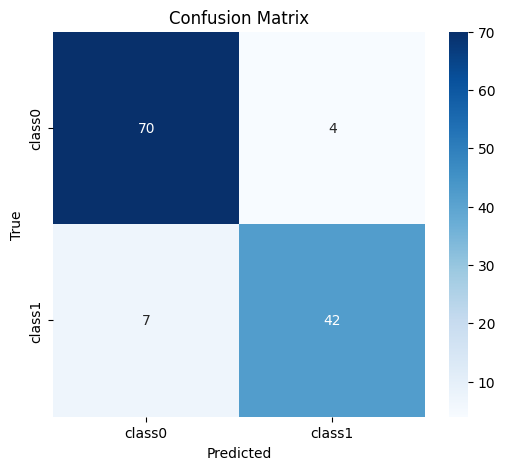

Classification Report:

              precision    recall  f1-score   support

      class0       0.91      0.95      0.93        74
      class1       0.91      0.86      0.88        49

    accuracy                           0.91       123
   macro avg       0.91      0.90      0.91       123
weighted avg       0.91      0.91      0.91       123

Sensitivity (Recall+): 0.8571
Specificity (Recall-): 0.9459
🔹 EfficientNet Evaluation
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step


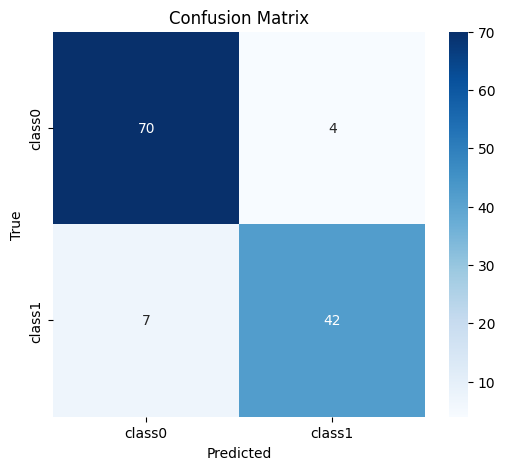

Classification Report:

              precision    recall  f1-score   support

      class0       0.91      0.95      0.93        74
      class1       0.91      0.86      0.88        49

    accuracy                           0.91       123
   macro avg       0.91      0.90      0.91       123
weighted avg       0.91      0.91      0.91       123

Sensitivity (Recall+): 0.8571
Specificity (Recall-): 0.9459
🔹 ResNet50 Evaluation
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step


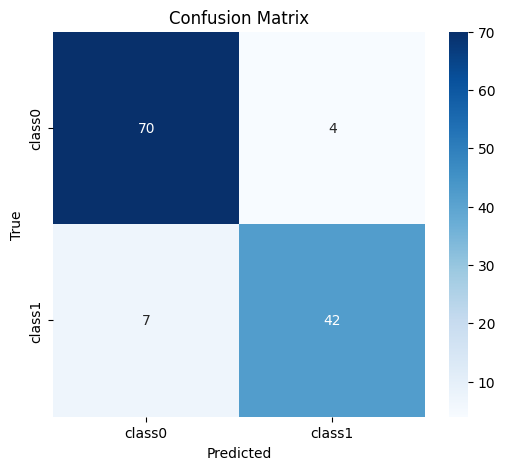

Classification Report:

              precision    recall  f1-score   support

      class0       0.91      0.95      0.93        74
      class1       0.91      0.86      0.88        49

    accuracy                           0.91       123
   macro avg       0.91      0.90      0.91       123
weighted avg       0.91      0.91      0.91       123

Sensitivity (Recall+): 0.8571
Specificity (Recall-): 0.9459


In [ ]:
class_names = ["class0", "class1"]   # replace with your actual class names


print("🔹 Sequential CNN (Mish) Evaluation")
evaluate_model(model, val_imgs, val_df, class_names)


print("🔹 EfficientNet Evaluation")
evaluate_model(model, val_imgs, val_df, class_names)

print("🔹 ResNet50 Evaluation")
evaluate_model(model, val_imgs, val_df, class_names)
   # use preprocessed images for ViT
